# SMOOTHING (LOWPASS) SPATIAL FILTERS

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## FILTERS



filters实际上就是通过一些特殊的kernel $w$ 对图片进行如下操作:
$$
g(x, y) = \sum_{s=-a}^a \sum_{t=-b}^b w(s, t) f(x+s, y+t), \: x = 1,2,\cdots, M, \: y = 1, 2,\cdots N.
$$
其中$w(s, t) \in \mathbb{R}^{m \times n}, m=2a+1, n = 2b+1$.

注: 一般来说kernel的边是奇数, 这样可以确定唯一的中心, 但是偶数其实也是可以的.

实际上, 上面可以转换成卷积的形式:
$$
(w * f) (x, y) = \sum_{s=-a}^a \sum_{t=-b}^b w'(s, t) f(x-s, y-t), \: x = 1,2,\cdots, M, \: y = 1, 2,\cdots N.
$$
只是$w'(s, t) = w(-s, -t)$, 不过下面我们仅考虑卷积操作, 故直接定义为:
$$
(w * f) (x, y) = \sum_{s=-a}^a \sum_{t=-b}^b w(s, t) f(x-s, y-t), \: x = 1,2,\cdots, M, \: y = 1, 2,\cdots N.
$$
即可.

注: 注意到上面会出现$f(-1, -1)$之类的未定义情况, 常见的处理方式是在图片周围加padding(分别为pad a, b), 比如补0或者镜像补.

用卷积的目的是其特别的性质:

1. $f * g = g * f$;
2. $f * (g * h) = (f * g) * h$;
3. $f * (g + h) = (f * g) + (g * h)$.

注: $f, g, h$应当形状一致.



特别的, 如果
$$
w = uv^T,
$$
则
$$
w * f = u' * (v^T * f), \quad u'(x) = u(-x).
$$
可以显著降低计算量.



## Box Filter Kernels

即
$$
w_{ij} = \frac{1}{mn}, \quad i=1,2,\cdots, m, \: j=1,2,\cdots, n.
$$

In [5]:
img = cv2.imread("./pics/alphabeta.png")
img.shape

(342, 342, 3)

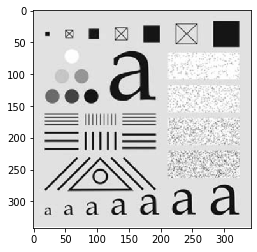

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 由于是截图, 先转成灰度图
plt.imshow(img, cmap='gray')

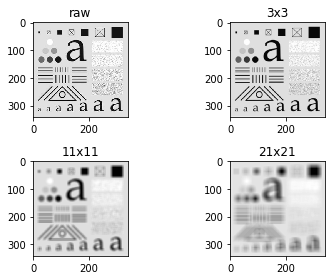

In [8]:
# 或者等价地用 cv2.blur(img, (m, n))
kernels = [np.ones((i, i)) / (i * i) for i in [3, 11, 21]]
imgs_smoothed = [cv2.filter2D(img, -1, kernel) for kernel in kernels]
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("raw")
axes[0, 1].imshow(imgs_smoothed[0], cmap="gray")
axes[0, 1].set_title("3x3")
axes[1, 0].imshow(imgs_smoothed[1], cmap="gray")
axes[1, 0].set_title("11x11")
axes[1, 1].imshow(imgs_smoothed[2], cmap="gray")
axes[1, 1].set_title("21x21")
plt.tight_layout()
plt.show()

### Lowpass Gaussian Filter Kernels



即
$$
w(s, t) = G(s, t) = K e^{-\frac{s^2+t^2}{2\sigma^2}},
$$
高斯分布的特点是绝大部分集中于$(-3\sigma, +3\sigma)$之间, 故一般$w$的大小选择为$(-6\sigma, +6\sigma)$, 需要注意的是, $\sigma$的选择和图片的大小息息相关.



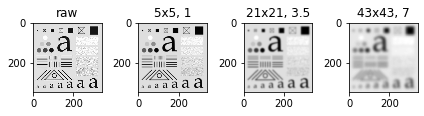

In [16]:
imgs_smoothed = [cv2.GaussianBlur(img, ksize=ksize, sigmaX=sigma) for (ksize, sigma) in [((5, 5), 1), ((21, 21), 3.5), ((43, 43), 7)]]
fig, axes = plt.subplots(1, 4)
axes[0].imshow(img, cmap='gray')
axes[0].set_title("raw")
axes[1].imshow(imgs_smoothed[0], cmap="gray")
axes[1].set_title("5x5, 1")
axes[2].imshow(imgs_smoothed[1], cmap="gray")
axes[2].set_title("21x21, 3.5")
axes[3].imshow(imgs_smoothed[2], cmap="gray")
axes[3].set_title("43x43, 7")
plt.tight_layout()
plt.show()

### Order-Statistic (Nonlinear) Filters

即$g(x, y)$由$(x, y)$周围的点的一个某个顺序的值代替, 比如median.

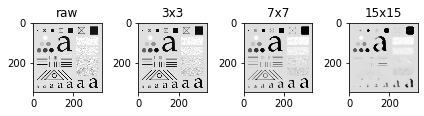

In [18]:
imgs_smoothed = [cv2.medianBlur(img, ksize=ksize) for ksize in [3, 7, 15]]
fig, axes = plt.subplots(1, 4)
axes[0].imshow(img, cmap='gray')
axes[0].set_title("raw")
axes[1].imshow(imgs_smoothed[0], cmap="gray")
axes[1].set_title("3x3")
axes[2].imshow(imgs_smoothed[1], cmap="gray")
axes[2].set_title("7x7")
axes[3].imshow(imgs_smoothed[2], cmap="gray")
axes[3].set_title("15x15")
plt.tight_layout()
plt.show()